# 1 Dependency import

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from math import ceil

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [101]:
def dataframe_distribution_overview(data, figsize=(10, 3)):
    plt.figure(figsize=figsize)

    sns.barplot(x=data.columns, y=data.count())

    plt.title("Number of values per column", size=20)
    plt.xticks(rotation=45, size=16, ha="right")
    plt.yticks(size=16)
    plt.ylabel("Number values", size=16)
    plt.show()

In [102]:
def index_lth(data, percentage: int):
    percentage = percentage / 100
    less_than = data.count() < data.shape[0] * percentage
    index_less_than = less_than[less_than == True].index
    return index_less_than

In [103]:
def multi_boxplot(data, features):
    n_cols = 8
    n_rows = ceil(data.loc[:, features].shape[1] / n_cols)
    index = 1

    plt.subplots(n_rows, n_cols, figsize=(30, 10))
    plt.subplots_adjust(wspace=0.35, hspace=0.35)

    for r in range(n_rows):
        for c in range(n_cols):
            plt.subplot(n_rows, n_cols, index)
            feature = data.loc[:, features].iloc[:, index-1].name
            boxplot = sns.boxplot(y=data[feature])
            boxplot.set_xlabel(feature, fontsize=12)
            boxplot.set_ylabel(None)
            
            index += 1

            if index > data.shape[1]:
                break
    plt.show()

In [104]:
# def create_subplot(data, feature, rows, index, is_numeric):
#     lt.subplot(n_rows, 2, index+1)
#     if is_numeric:
#         boxplot = sns.boxplot(y=data2[f])
#         boxplot.set_xlabel(feature, fontsize=12)
#         boxplot.set_ylabel(None)
#     else:
#         countplot = sns.countplot(y=data2[f])
#         countplot.set_xlabel(feature, fontsize=12)
#         countplot.set_ylabel(None)

# def dataset_diff_analysis(data1, data2, features):
#     n_rows = len(features)
#     col_id = 0
#     index = 1

#     plt.subplots(n_rows, 2, figsize=(30, 10))
#     plt.subplots_adjust(wspace=0.35, hspace=0.35)

#     for f in features:
#         is_numeric = True
#         if data1[f].dtype == "object":
#             is_numeric = False

#         create_subplot(data1, f, n_rows, index, is_numeric)
#         create_subplot(data2, f, n_rows, index, is_numeric)

#     index += 2

#     plt.show()

In [105]:
class OutlierProcessor():
    def __init__(self, data, feature, lower_trig, upper_trig):
        self.data = data
        self.feature = feature
        self.lower_trig = lower_trig
        self.upper_trig = upper_trig
        self.__above = 0
        self.__below = 0
        self.__total = 0

    def __print(self):
        print(f"lower_trig: {self.lower_trig}")
        print(f"upper_trig: {self.upper_trig}")
        print(f"below: {self.__below}")
        print(f"above: {self.__above}")
        print(f"total: {self.__total}")

    def count(self):
        self.__below = self.data[self.data[self.feature] < self.lower_trig][self.feature].count()
        self.__above = self.data[self.data[self.feature] > self.upper_trig][self.feature].count()
        self.__total = self.__below + self.__above
        self.__print()

    def replace(self, replace_by=np.nan, inplace=False):
        return self.data[self.feature].where(cond=lambda x: ((x > self.lower_trig) & (self.upper_trig > x)), other=replace_by, inplace=inplace)


In [106]:
class OutlierIqrProcessor(OutlierProcessor):
    def __init__(self, data, feature):
        self.__q1 = data[feature].quantile(0.25)
        self.__q3 = data[feature].quantile(0.75)
        self.__iqr = self.__q3 - self.__q1
        upper_trig = self.__q3 + (1.5 * self.__iqr)
        lower_trig = self.__q1 - (1.5 * self.__iqr)
        super().__init__(data, feature, lower_trig, upper_trig)


***
# 2 Data loading

## 2.1 Loading

In [107]:
data = pd.read_csv("data/2015-building-energy-benchmarking.csv", delimiter=",")

In [108]:
data2 = pd.read_csv("data/2016-building-energy-benchmarking.csv", delimiter=",")

***
## 2.2 Comparison

In [109]:
inter_cols = data.columns.intersection(data2.columns)
print(f"nb: {len(inter_cols)}")
inter_cols

nb: 37


Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'DefaultData', 'ComplianceStatus', 'Outlier'],
      dtype='object')

In [110]:
data[data.columns.difference(inter_cols)].columns

Index(['2010 Census Tracts', 'City Council Districts', 'Comment',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'Location', 'OtherFuelUse(kBtu)', 'SPD Beats',
       'Seattle Police Department Micro Community Policing Plan Areas',
       'Zip Codes'],
      dtype='object')

In [111]:
data2[data2.columns.difference(inter_cols)].columns

Index(['Address', 'City', 'Comments', 'GHGEmissionsIntensity', 'Latitude',
       'Longitude', 'State', 'TotalGHGEmissions', 'ZipCode'],
      dtype='object')

***
## 2.3 Correction

### 2.3.1 ZipCode

In [112]:
data["Zip Codes"].describe()

count     3340.000000
mean     18786.680240
std        588.604192
min      17916.000000
25%      18379.000000
50%      18390.000000
75%      19576.000000
max      19584.000000
Name: Zip Codes, dtype: float64

In [113]:
data2["ZipCode"].describe()

count     3360.000000
mean     98116.949107
std         18.615205
min      98006.000000
25%      98105.000000
50%      98115.000000
75%      98122.000000
max      98272.000000
Name: ZipCode, dtype: float64

In [114]:
data.rename(columns={
    "Zip Codes": "ZipCode"
}, inplace=True)

***
### 2.3.2

In [115]:
data[data["Comment"].notna()].Comment.head()

62     Under construction starting 6/2013 (old buildi...
436    Part of McKinstry's campus, property operates ...
437    One of two office buildings on McKinstry's cam...
595    Part of McKinstry’s campus, this remodeled war...
719    Construction completed in mid 2015. The buildi...
Name: Comment, dtype: object

In [116]:
data2[data2["Comments"].notna()].Comments.head()

Series([], Name: Comments, dtype: float64)

In [117]:
data2["Comments"].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Comments, dtype: float64

In [118]:
data.rename(columns={
    "Comment": "Comments"
}, inplace=True)

***
### 2.3.2 Latitude, Longitude

In [119]:
data2.loc[:, ["Latitude", "Longitude"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   3376 non-null   float64
 1   Longitude  3376 non-null   float64
dtypes: float64(2)
memory usage: 52.9 KB


In [120]:
data["Latitude"] = pd.Series(data=0, name="Latitude", dtype="float64")
data["Longitude"] = pd.Series(data=0, name="Longitude", dtype="float64")

***
### 2.3.3 Address

In [121]:
data2["Address"].head()

0      405 Olive way
1    724 Pine street
2    1900 5th Avenue
3     620 STEWART ST
4      401 LENORA ST
Name: Address, dtype: object

In [122]:
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comments,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,ZipCode,Latitude,Longitude
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,0.0,0.0
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,NaN,NaN
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081,NaN,NaN
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081,NaN,NaN
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576,NaN,NaN


In [123]:
data["Address"] = pd.Series(data=np.nan, name="Address", dtype="object")

***
### 2.3.4 Location

In [124]:
data["Location"].describe()

count                                                  3340
unique                                                 3298
top       {'latitude': '47.52593209', 'longitude': '-122...
freq                                                      5
Name: Location, dtype: object

In [125]:
data2["Location"] = pd.Series(data=np.nan, name="Location", dtype="object")

***
### 2.3.5 City

In [126]:
data2["City"].head()

0    Seattle
1    Seattle
2    Seattle
3    Seattle
4    Seattle
Name: City, dtype: object

In [127]:
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comments,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,ZipCode,Latitude,Longitude,Address
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,0.0,0.0,NaN
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,NaN,NaN,NaN
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081,NaN,NaN,NaN
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081,NaN,NaN,NaN
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576,NaN,NaN,NaN


In [128]:
data["City"] = pd.Series(data=np.nan, name="City", dtype="object")

***
### 2.3.6 GHGEmissionsIntensity

In [129]:
data2["GHGEmissionsIntensity"].describe()

count    3367.000000
mean        1.175916
std         1.821452
min        -0.020000
25%         0.210000
50%         0.610000
75%         1.370000
max        34.090000
Name: GHGEmissionsIntensity, dtype: float64

In [130]:
data["GHGEmissionsIntensity(kgCO2e/ft2)"].describe()

count    3330.000000
mean        0.985339
std         1.637172
min         0.000000
25%         0.080000
50%         0.460000
75%         1.180000
max        31.380000
Name: GHGEmissionsIntensity(kgCO2e/ft2), dtype: float64

In [131]:
data2.rename(columns={
    "GHGEmissionsIntensity": "GHGEmissionsIntensity(kgCO2e/ft2)"
}, inplace=True)

***
### 2.3.7 State

In [132]:
data2["State"].head()

0    WA
1    WA
2    WA
3    WA
4    WA
Name: State, dtype: object

In [133]:
data["State"] = pd.Series(data=np.nan, name="State", dtype="object")

***
### 2.3.8 TotalGHGEmissions

In [134]:
data2["TotalGHGEmissions"].describe()

count     3367.000000
mean       119.723971
std        538.832227
min         -0.800000
25%          9.495000
50%         33.920000
75%         93.940000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

In [135]:
data["GHGEmissions(MetricTonsCO2e)"].describe()

count     3330.000000
mean       110.094102
std        409.450179
min          0.000000
25%          9.265000
50%         32.740000
75%         88.642500
max      11824.890000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

In [136]:
data2.rename(columns={
    "TotalGHGEmissions": "GHGEmissions(MetricTonsCO2e)"
}, inplace=True)

***
### 2.3.9 2010 Census Tracts

In [137]:
data["2010 Census Tracts"].describe()

count    224.000000
mean     123.062500
std        5.812128
min      116.000000
25%      117.000000
50%      123.000000
75%      125.500000
max      135.000000
Name: 2010 Census Tracts, dtype: float64

In [138]:
data2["2010 Census Tracts"] = pd.Series(data=np.nan, name="2010 Census Tracts", dtype="float64")

***
### 2.3.10 City Council Districts

In [139]:
data["City Council Districts"].describe()

count    213.000000
mean       1.347418
std        0.477272
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: City Council Districts, dtype: float64

In [140]:
data2["City Council Districts"] = pd.Series(data=np.nan, name="City Council Districts", dtype="float64")

***
### 2.3.11 OtherFuelUse(kBtu)

In [141]:
data["OtherFuelUse(kBtu)"].describe()

count    3.330000e+03
mean     7.142301e+03
std      1.962790e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.269669e+06
Name: OtherFuelUse(kBtu), dtype: float64

In [142]:
data2["OtherFuelUse(kBtu)"] = pd.Series(data=np.nan, name="OtherFuelUse(kBtu)", dtype="float64")

***
### 2.3.12 SPD Beats

In [143]:
data["SPD Beats"].describe()

count    3338.000000
mean       24.825644
std        15.006287
min         1.000000
25%        10.000000
50%        26.000000
75%        38.000000
max        51.000000
Name: SPD Beats, dtype: float64

In [144]:
data2["SPD Beats"] = pd.Series(data=np.nan, name="SPD Beats", dtype="float64")

***
### 2.3.13 Seattle Police Department Micro Community Policing Plan Areas

In [145]:
data["Seattle Police Department Micro Community Policing Plan Areas"].describe()

count    3338.000000
mean       32.380168
std        19.907567
min         1.000000
25%        14.000000
50%        33.000000
75%        50.000000
max        61.000000
Name: Seattle Police Department Micro Community Policing Plan Areas, dtype: float64

In [146]:
data2["Seattle Police Department Micro Community Policing Plan Areas"] = pd.Series(data=np.nan, name="Seattle Police Department Micro Community Policing Plan Areas", dtype="float64")

***
### 2.3.14 Results

In [147]:
inter_cols = data.columns.intersection(data2.columns)
print(f"nb: {len(inter_cols)}")
inter_cols

nb: 52


Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

In [148]:
data[data.columns.difference(inter_cols)].columns

Index([], dtype='object')

In [149]:
data2[data2.columns.difference(inter_cols)].columns

Index([], dtype='object')

***
## 2.4 Concatenation

In [150]:
data = pd.concat([data, data2])

In [151]:
# def multi_boxplot(data, features):
#     n_cols = 8
#     n_rows = ceil(data.loc[:, features].shape[1] / n_cols)
#     index = 1

#     plt.subplots(n_rows, n_cols, figsize=(30, 10))
#     plt.subplots_adjust(wspace=0.35, hspace=0.35)

#     for r in range(n_rows):
#         for c in range(n_cols):
#             plt.subplot(n_rows, n_cols, index)
#             feature = data.loc[:, features].iloc[:, index-1].name
#             boxplot = sns.boxplot(y=data[feature])
#             boxplot.set_xlabel(feature, fontsize=12)
#             boxplot.set_ylabel(None)
            
#             index += 1

#             if index > data.shape[1]:
#                 break
#     plt.show()

KeyboardInterrupt: 

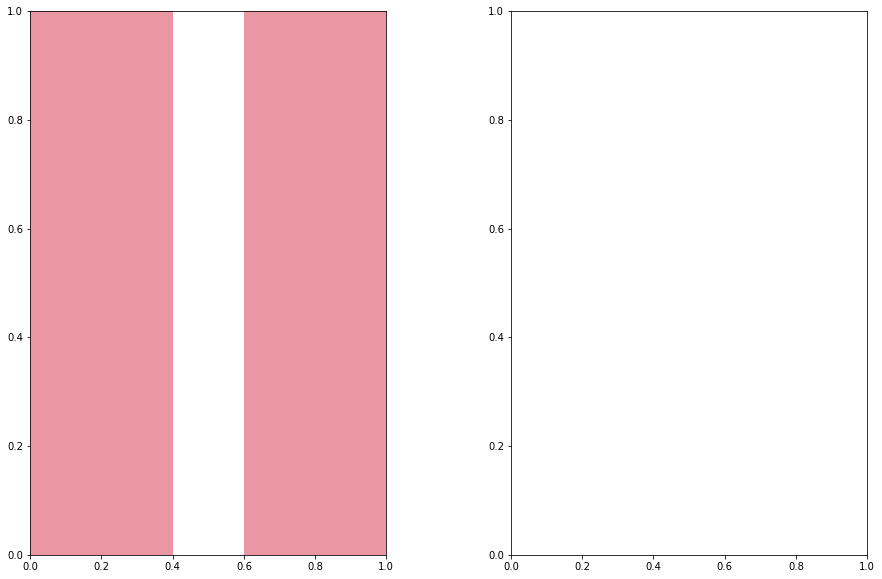

In [190]:
def create_subplot(data, feature, n_rows, index, is_numeric):
    plt.subplot(n_rows, 2, index)
    uniques = data["OSEBuildingID"].unique()

    if is_numeric:
        plot = sns.countplot(x=data[feature])
    else:
        if unique.size < 20:
            plot = sns.boxplot(y=data[feature])
        else:
            duplicates = data["OSEBuildingID"] 
            dist = pd.DataFrame({
                "uniques": uniques,
                "duplicates": duplicates
            })
            plot = sns.countplot(data=dist)

    plot.set_xlabel(feature, fontsize=12)
    plot.set_ylabel(None)


def dataset_diff_analysis(data1, data2):
    features = data.columns.intersection(data2.columns).values[:1]
    n_cols = 2
    n_rows = len(features)
    col_id = 0
    index = 1

    plt.subplots(n_rows, n_cols, figsize=(15, 10))
    plt.subplots_adjust(wspace=0.35, hspace=0.35)

    for f in features:
        is_numeric = True
        f_type = data1[f].dtype
        if data1[f].dtype == "object":
            is_numeric = False

        create_subplot(data1, f, n_rows, index, is_numeric)
        create_subplot(data2, f, n_rows, index+1, is_numeric)

    index += 2

    plt.show()



dataset_diff_analysis(data, data2)

In [ ]:
# dataset_diff_analysis(data, data2)

***
# 3 Overview

In [ ]:
dataframe_distribution_overview(data, figsize=(30, 3))

***
# 4 Cleaning

## 4.1 Target

In [ ]:
target = "SiteEnergyUse(kBtu)"

In [ ]:
data[data[target].isna()].loc[:, [target]]

In [ ]:
data.dropna(subset=["SiteEnergyUse(kBtu)"], inplace=True)

In [ ]:
data[data[target].isna()].loc[:, [target]]

***
## 4.1 Emptyness

In [ ]:
cols_to_remove = index_lth(data, 10)

In [ ]:
data.drop(columns=cols_to_remove, inplace=True)

In [ ]:
dataframe_distribution_overview(data, figsize=(30, 3))

***
## 4.2 Usability

### 4.2.1 Numericals

In [ ]:
numerical_data = data.select_dtypes(["int64", "float64"])

In [ ]:
multi_boxplot(data, numerical_data.columns.values)

In [ ]:
numerical_data.columns

In [ ]:
data["NumberofBuildings"].idxmax()

In [ ]:
data["PropertyGFATotal"].idxmax()

In [ ]:
data["PropertyGFABuilding(s)"].idxmax()

In [ ]:
data.loc[3274]

In [ ]:
len(data.index.unique().values)

In [ ]:
data.shape

In [ ]:
data.duplicated().any()

***
#### 4.2.1.1 OSEBuildingID

In [ ]:
data["OSEBuildingID"].describe()

In [ ]:
op = OutlierIqrProcessor(data, "OSEBuildingID").count()

***
#### 4.2.1.2 PropertyGFATotal

In [ ]:
data["PropertyGFATotal"].describe()

In [ ]:
op = OutlierProcessor(data, "PropertyGFATotal", 0, 3e+06)

In [ ]:
op.count()

In [ ]:
# op.replace(inplace=True)

***
#### 4.2.1.3 Latitude

In [ ]:
data["Latitude"].describe()

In [ ]:
op = OutlierProcessor(data, "Latitude", 20, 50)

In [ ]:
op.count()

In [ ]:
op.replace(inplace=True)

***
#### 4.2.1.4 Longitude

In [ ]:
data["Longitude"].describe()

In [ ]:
op = OutlierProcessor(data, "Longitude", -130, -50)

In [ ]:
op.count()

In [ ]:
op.replace(inplace=True)

***
### 4.2.2 Categoricals

In [ ]:
categorical_data = data.select_dtypes("object")
categorical_data.describe()

***
# 5 Correlations

In [ ]:
plt.figure(figsize=(30, 20))

correlation = data.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))

sns.heatmap(data=correlation, mask=mask, annot=True, vmax=.75, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Correlation heatmap", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.show()

In [ ]:
categs = data.select_dtypes(include="object")

In [ ]:
def categorize(feature):
    new_feature = feature.astype("category").cat.codes
    return new_feature

In [ ]:
categs_to_nums = categs.apply(lambda col: categorize(col))

In [ ]:
for col in categs_to_nums.columns:
    categs_to_nums.rename(columns={col: col + "_CATEG"}, inplace=True)

In [ ]:
data_enhanced = data.join([categs_to_nums])

In [ ]:
plt.figure(figsize=(30, 20))

correlation = data_enhanced.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))

sns.heatmap(data=correlation, mask=mask, annot=True, vmax=.75, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Correlation heatmap", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.show()

***
# 6 Saving

In [ ]:
data.to_csv("data/data-cleaned.csv", sep=",")

***
# 7 ...